#**Using Machine Learning to Predicting Stock Prices**
Author: Kevin Xu 
##**Abstract**
For this project, I decided to use machine learning to implement a program that would accurately predict stocks. After doing some research on existing machine learning alogrithms, I decided to use the k-nearest neighbors (KNN) supervised machine learning algorithm because my program would be dealing with classification. Moreover, an accuracy score will be provided to gauge the performance of the program. 
  
Future steps to improve this model are detailed at the end of this notebook.
##**Methods**
This machine learning program makes predictions on the Apple stock, which has the stock symbol AAPL. These predictions will be made using the following steps:
1.   Import AAPL stock data from Yahoo! finance API 
2.   Preparing data
3.   Create and train model
4.   Test Model


##**Import Libraries**

In [163]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

##**Exploring Data**

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0
1980-12-19,0.098707,0.099143,0.098707,0.098707,48630400,0.0,0.0
1980-12-22,0.103511,0.103948,0.103511,0.103511,37363200,0.0,0.0
1980-12-23,0.107879,0.108315,0.107879,0.107879,46950400,0.0,0.0
1980-12-24,0.113556,0.113993,0.113556,0.113556,48003200,0.0,0.0


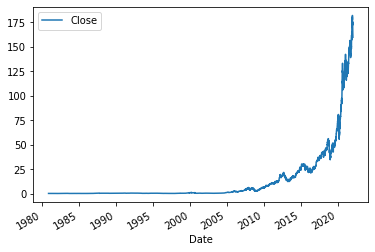

In [164]:
# Use Yahoo! Finance API to import data
aapl = yf.Ticker("AAPL")
aapl = aapl.history(period = "max")

# Closing Price Graph
aapl.plot.line(y="Close", use_index=True)
# First 10 rows of stock at initial IPO
aapl.head(10)

##**Data Processing**

In [165]:
# Identify Original Close Price
data = aapl[["Close"]]
data = data.rename(columns = {'Close':'Original Close'})
# Identify state of close price (Up or Down)
data["state"] = aapl.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
data.head(10)

,Original Close,state
Date,,
1980-12-12,0.100453,NaN
1980-12-15,0.095213,0.0
1980-12-16,0.088224,0.0
1980-12-17,0.090408,1.0
1980-12-18,0.093029,1.0
1980-12-19,0.098707,1.0
1980-12-22,0.103511,1.0
1980-12-23,0.107879,1.0
1980-12-24,0.113556,1.0


In [166]:
# Shift data by one day to use previous day to predict current day
aapl_shift = aapl.copy()
aapl_shift = aapl.shift(1)
aapl.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0
1980-12-19,0.098707,0.099143,0.098707,0.098707,48630400,0.0,0.0
1980-12-22,0.103511,0.103948,0.103511,0.103511,37363200,0.0,0.0
1980-12-23,0.107879,0.108315,0.107879,0.107879,46950400,0.0,0.0
1980-12-24,0.113556,0.113993,0.113556,0.113556,48003200,0.0,0.0


#**Merge Data**

In [167]:
predict = ["Close", "High", "Low", "Open", "Volume"]
data = data.join(aapl_shift[predict]).iloc[1:]
data.head(5)

,Original Close,state,Close,High,Low,Open,Volume
Date,,,,,,,
1980-12-15,0.095213,0.0,0.100453,0.100890,0.100453,0.100453,469033600.0
1980-12-16,0.088224,0.0,0.095213,0.095649,0.095213,0.095649,175884800.0
1980-12-17,0.090408,1.0,0.088224,0.088661,0.088224,0.088661,105728000.0
1980-12-18,0.093029,1.0,0.090408,0.090845,0.090408,0.090408,86441600.0
1980-12-19,0.098707,1.0,0.093029,0.093466,0.093029,0.093029,73449600.0


##**Create and Train Model**

In [173]:
from sklearn.neighbors import KNeighborsClassifier
# Create Model
model = KNeighborsClassifier(n_neighbors= 100)

# Train Dataset using all rows except last 200 rows to predict last 100 rows
train = data.iloc[:-200]
test = data.iloc[-100:]

model.fit(train[predict], train["state"])

KNeighborsClassifier(n_neighbors=100)

##**Measuring Accuracy**

In [174]:
from sklearn.metrics import accuracy_score

# Determine accuracy of predictions
pred = model.predict(test[predict])
pred = pd.Series(pred, index=test.index)
pred

Date
2021-09-03    0.0
2021-09-07    0.0
2021-09-08    1.0
2021-09-09    0.0
2021-09-10    0.0
             ... 
2022-01-20    1.0
2022-01-21    1.0
2022-01-24    0.0
2022-01-25    0.0
2022-01-26    1.0
Length: 100, dtype: float64

In [175]:
# Show Accuracy 
accuracy_score(test["state"], pred) 

0.57

#**Combine Predictions**

In [193]:
concat = pd.concat({"state": test["state"], "Predictions": pred}, axis = 1)
concat.head(10)

,state,Predictions
Date,,
2021-09-03,1.0,0.0
2021-09-07,1.0,0.0
2021-09-08,0.0,1.0
2021-09-09,0.0,0.0
2021-09-10,0.0,0.0
2021-09-13,1.0,0.0
2021-09-14,0.0,0.0
2021-09-15,1.0,0.0
2021-09-16,0.0,0.0


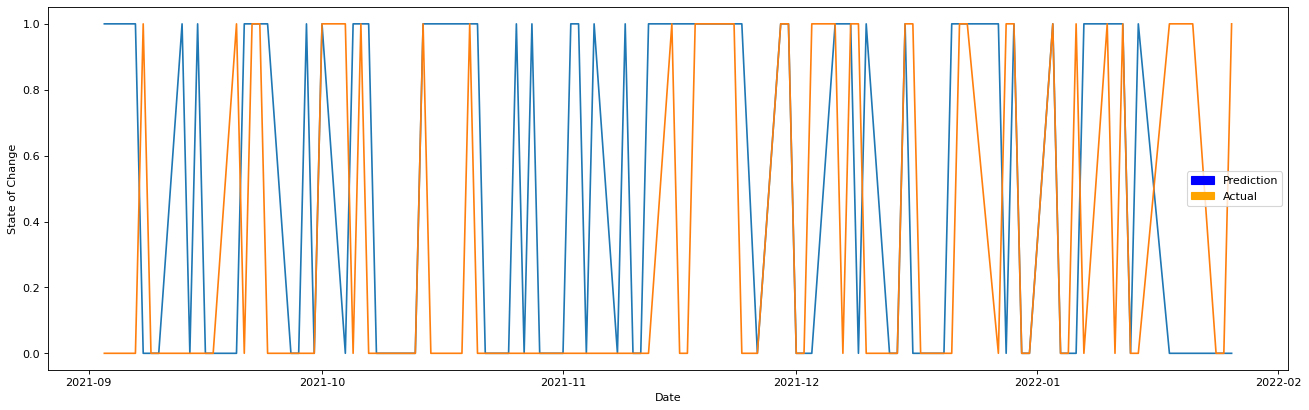

In [202]:
# Graph of Predictions
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

prediction = mpatches.Patch(color='blue', label='Prediction')
original = mpatches.Patch(color='orange', label='Actual')

plt.legend(handles=[prediction, original])
plt.ylabel("State of Change")
plt.xlabel("Date")
plt.plot(concat)

#**Future Steps**
1.   Create backtesting function to assess the viability of a trading strategy
2.   Add other stocks to into dataset and scope of model